## Daily Female Births

In [59]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cheching the dataset

dataset = pd.read_csv('daily-total-female-births.csv')
dataset.sample(8)


,Date,Births
294,1959-10-22,47
337,1959-12-04,41
201,1959-07-21,47
108,1959-04-19,46
40,1959-02-10,51
28,1959-01-29,44
144,1959-05-25,37
243,1959-09-01,38


In [3]:
series = pd.read_csv('daily-total-female-births.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [4]:
# number of observation
print(series.size)

365


In [5]:
# descriptive statistics

print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


## Feature Engineering

In [6]:
# creating date time feature of the series

dataframe = pd.DataFrame()

dataframe['Year'] = [series.index[i].year for i in range(len(series))]
dataframe['Month'] = [series.index[i].month for i in range(len(series))]
dataframe['Day'] = [series.index[i].day for i in range(len(series))]
dataframe['Births'] = [series[i] for i in range(len(series))]

print(dataframe.head())

   Year  Month  Day  Births
0  1959      1    1      35
1  1959      1    2      32
2  1959      1    3      30
3  1959      1    4      31
4  1959      1    5      44


In [13]:
# creating a lag feature for daily temperature dataset

births = pd.DataFrame(series.values)


dataframe = pd.concat([births.shift(1), births], axis = 1)
dataframe.columns = ['b', 'b+1']
print(dataframe.head())

      b  b+1
0   NaN   35
1  35.0   32
2  32.0   30
3  30.0   31
4  31.0   44


In [17]:
# creating lag features (using the last three values)

births = pd.DataFrame(series.values)

dataframe = pd.concat([births.shift(3), births.shift(2), births.shift(1), births], axis = 1)
dataframe.columns = ['b-2', 'b-1', 'b', 'b+1']
print(dataframe.head())

    b-2   b-1     b  b+1
0   NaN   NaN   NaN   35
1   NaN   NaN  35.0   32
2   NaN  35.0  32.0   30
3  35.0  32.0  30.0   31
4  32.0  30.0  31.0   44


In [20]:
# creating a rolling mean feature

births = pd.DataFrame(series.values)
shifted = births.shift(1)
window = shifted.rolling(window =2)
means = window.mean()
dataframe = pd.concat([means, births], axis = 1)
dataframe.columns = ['mean(b-1,b)', 'b+1']
print(dataframe.head())

   mean(b-1,b)  b+1
0          NaN   35
1          NaN   32
2         33.5   30
3         31.0   31
4         30.5   44


In [21]:
# creating rolling statistics features

births = pd.DataFrame(series.values)
width = 3
shifted = births.shift(width - 1)
window = shifted.rolling(window = width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), births], axis = 1)
dataframe.columns = ['min',  'mean', 'max', 'b+1']
print(dataframe.head())

    min       mean   max  b+1
0   NaN        NaN   NaN   35
1   NaN        NaN   NaN   32
2   NaN        NaN   NaN   30
3   NaN        NaN   NaN   31
4  30.0  32.333333  35.0   44


In [24]:
# creating expanding window features with statistics adding the min, mean, max

# create expanding window features

births = pd.DataFrame(series.values)
window = births.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), births.shift(-1)], axis = 1)
dataframe.columns = ['min', 'means', 'max', 'b+1']
print(dataframe.head())

    min      means   max   b+1
0  35.0  35.000000  35.0  32.0
1  32.0  33.500000  35.0  30.0
2  30.0  32.333333  35.0  31.0
3  30.0  32.000000  35.0  44.0
4  30.0  34.400000  44.0  29.0


## Visualizing the series

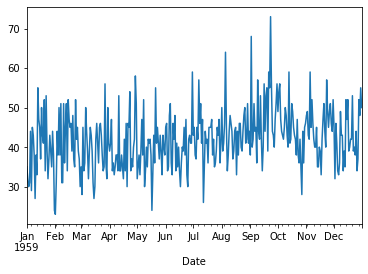

In [25]:
# creating a line plot

series.plot()
plt.show()

              Year      Month  Births
Year Month                           
1959 1      1959.0    January    39.0
     2      1959.0   February    41.0
     3      1959.0      March    39.0
     4      1959.0      April    40.0
     5      1959.0        May    39.0
     6      1959.0       June    40.0
     7      1959.0       July    42.0
     8      1959.0     August    44.0
     9      1959.0  September    48.0
     10     1959.0    October    44.0
     11     1959.0   November    45.0
     12     1959.0   December    42.0


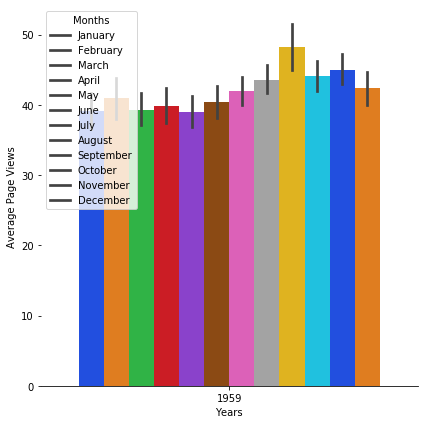

In [64]:
# Creating bar plot of the series by monthly births
df_births = pd.DataFrame()

df_births['Year'] = [series.index[i].year for i in range(len(series))]
df_births['Month'] = [series.index[i].month for i in range(len(series))]
df_births['Births'] = [series[i] for i in range(len(series))]

mg = df_births.groupby(by=[df_births["Year"], df_births["Month"]])
a = round(mg.mean())
a.index.names = ["Year", "Month"]

a["Month"] = a["Month"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 
                                   6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})
df_bar = a
print(a)

    # Draw bar plot
g = sns.catplot(x="Year", y="Births", hue="Month", data=df_births, height=6, kind="bar", palette="bright", legend=False,)
g.despine(left=True)
g.set_ylabels("Average Page Views")
g.set_xlabels("Years")
plt.legend(title='Months', loc='upper left', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

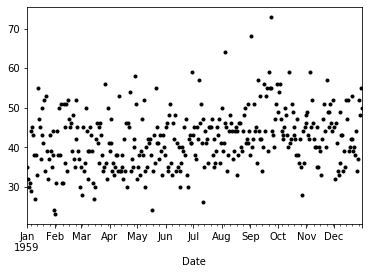

In [27]:
# creating a dot plot

series.plot(style = 'k.')
plt.show()

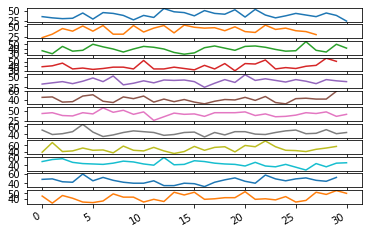

In [43]:
# creating a sketched line plots

#one_year = series['1959']
groups = series.groupby(pd.Grouper(freq = 'M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis = 1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.plot(subplots = True, legend = False)
plt.show()


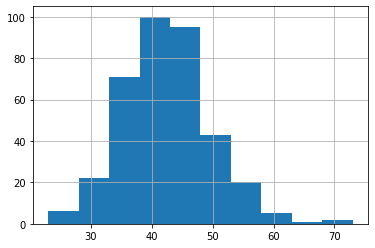

In [44]:
# creating a histogram plot

series.hist()
plt.show()

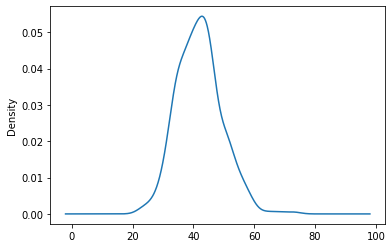

In [45]:
# creating the density plot

series.plot(kind = 'kde')
plt.show()

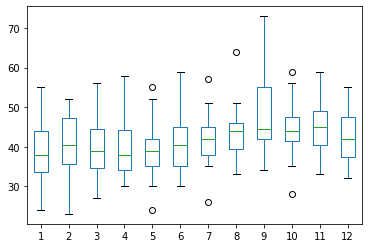

In [46]:
#one_year = series['1959']
groups = series.groupby(pd.Grouper(freq = 'M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis = 1)
months = pd.DataFrame(months)
months.columns = range(1,13)

months.plot.box()
plt.show()

In [ ]:
# creating the heat map of monthly data



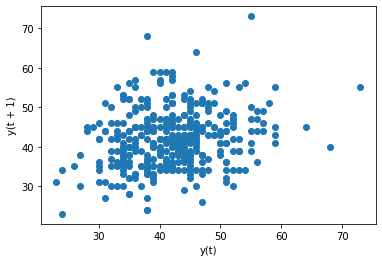

In [50]:
# create a lag scatter plot
pd.plotting.lag_plot(series)
plt.show()

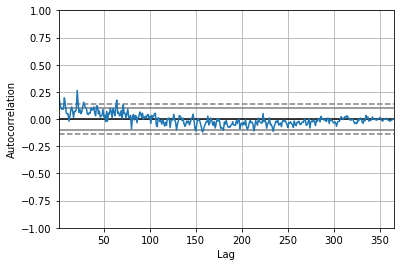

In [52]:
# creating an autocorrelation plot

pd.plotting.autocorrelation_plot(series)
plt.show()

In [ ]:
# creating  